# Exam: EDA and Machine Learning Modeling with OOP in Python


##  Business Context

###  Project Title: Predicting Youth Employment Status in South Africa

#### Dataset Description

Youth unemployment is one of the most pressing challenges in South Africa. Despite various government and private-sector initiatives, a significant proportion of young individuals remain unemployed or disengaged from productive economic activities.

This project aims to leverage data collected from a national longitudinal survey of South African youth to build a predictive model. The goal is to identify the key demographic, educational, and socio-economic factors that influence a young person's probability of being employed one year after their initial interview. By doing so, we can support policymakers, educators, and workforce development programs in better targeting interventions.

---

####  Dataset Description

The dataset was collected across **four survey rounds**. Each row represents a unique individual, capturing data from the **baseline survey** (i.e., the first time the individual participated). The **target variable** indicates whether the person was employed **one year later**.

####  Variable Descriptions

| Variable           | Description |
|--------------------|-------------|
| `Person_id`        | Unique identifier for each respondent |
| `Survey_date`      | Date when the baseline survey was conducted |
| `Round`            | Survey round number (1 to 4) |
| `Status`           | Individual's employment or study status at baseline (categorical) |
| `Tenure`           | Duration in months of the current or most recent job/study |
| `Geography`        | Urban or rural location |
| `Province`         | South African province of residence |
| `Matric`           | Whether the individual passed matric (1 = Yes, 0 = No) |
| `Degree`           | Holds a university degree (1 = Yes, 0 = No) |
| `Diploma`          | Holds a diploma (1 = Yes, 0 = No) |
| `Schoolquintile`   | Socio-economic level of the attended school (1 = poorest, 5 = richest) |
| `Math`             | Final school math result (percentage or score) |
| `Mathlit`          | Final mathematical literacy score |
| `Additional_lang`  | Score in additional language subject |
| `Home_lang`        | Score in home language subject |
| `Science`          | Final school science result |
| `Female`           | Gender (1 = Female, 0 = Male) |
| `Sa_citizen`       | South African citizenship (1 = Yes, 0 = No) |
| `Birthyear`        | Year of birth |
| `Birthmonth`       | Month of birth |
| `Target`           | Employed at follow-up (1 year later) (1 = Yes, 0 = No) |

---

#### Objective

The goal is to use the baseline features to **predict the employment status** (`Target`) of each youth one year after the initial survey. This can help in:
- Identifying high-risk individuals for unemployment.
- Providing data-driven insights to reduce youth joblessness.



## Section A: Exploratory Data Analysis (EDA)

### 1.	Data Inspection

#### load package 

In [ ]:
import pandas as pd 
import pathlib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
import time
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings

#### load data 

In [ ]:
data=pd.read_csv(r"path")
df=pd.DataFrame(data)
df.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


####	Analyze the Structure of the Data 

In [127]:
from IPython.display import display, Markdown
class DataSummarizer:
    def __init__(self, df):
        self.df = df

    def basic_info(self):
        rows, cols = self.df.shape
        display(Markdown("##  **Basic Info**"))
        display(Markdown(f"- **Rows:** {rows:,}"))
        display(Markdown(f"- **Columns:** {cols:,}"))
        display(Markdown("###  **Column Names**"))
        display(Markdown(", ".join([f"`{col}`" for col in self.df.columns])))

    def data_types(self):
        display(Markdown("##  **Data Types Summary**"))
        type_counts = self.df.dtypes.value_counts().to_frame("Count")
        display(type_counts)

    def variable_types(self):
        display(Markdown("##  **Variable Types**"))
        cat_vars = self.df.select_dtypes(include="object").columns
        num_vars = self.df.select_dtypes(include="number").columns

        display(Markdown("### Categorical Variables"))
        if cat_vars.any():
            display(Markdown(", ".join([f"`{col}`" for col in cat_vars])))
        else:
            display(Markdown("_None_"))

        display(Markdown("### Numerical Variables"))
        if num_vars.any():
            display(Markdown(", ".join([f"`{col}`" for col in num_vars])))
        else:
            display(Markdown("_None_"))

    def missing_values(self):
        display(Markdown("## **Missing Values**"))
        missing = self.df.isnull().sum()
        missing = missing[missing > 0]
        if missing.empty:
            display(Markdown("_No missing values detected._"))
        else:
            display(missing.to_frame("Missing").rename_axis("Variable"))

    def summarize_all(self):
        self.basic_info()
        self.data_types()
        self.variable_types()
        self.missing_values()
        
summarizer = DataSummarizer(df)
summarizer.summarize_all()


##  **Basic Info**

- **Rows:** 4,020

- **Columns:** 21

###  **Column Names**

`Person_id`, `Survey_date`, `Round`, `Status`, `Tenure`, `Geography`, `Province`, `Matric`, `Degree`, `Diploma`, `Schoolquintile`, `Math`, `Mathlit`, `Additional_lang`, `Home_lang`, `Science`, `Female`, `Sa_citizen`, `Birthyear`, `Birthmonth`, `Target`

##  **Data Types Summary**

,Count
object,10
int64,6
float64,5


##  **Variable Types**

### Categorical Variables

`Person_id`, `Survey_date`, `Status`, `Geography`, `Province`, `Math`, `Mathlit`, `Additional_lang`, `Home_lang`, `Science`

### Numerical Variables

`Round`, `Tenure`, `Matric`, `Degree`, `Diploma`, `Schoolquintile`, `Female`, `Sa_citizen`, `Birthyear`, `Birthmonth`, `Target`

## **Missing Values**

,Missing
Variable,
Tenure,1394
Matric,1008
Degree,1831
Diploma,1809
Schoolquintile,1661
Math,3023
Mathlit,2667
Additional_lang,2002
Home_lang,3639


### 2.	Univariate Analysis

In [128]:
dtypes = df.dtypes.reset_index()
dtypes.columns = ['column_name', 'dtype']
dtypes['dtype'] = dtypes['dtype'].astype(str)  
print('Df dtypes:')
print(dtypes.groupby('dtype').size())

Df dtypes:
dtype
float64     5
int64       6
object     10
dtype: int64


#####  numerical variables

In [129]:
def numeric_analysis(df):
        return print(df.describe().T)
numeric_analysis(df)

                 count         mean         std     min     25%     50%  \
Round           4020.0     3.129851    0.978014     1.0     2.0     3.0   
Tenure          2626.0   582.883092  621.220657     0.0    95.0   395.0   
Matric          3012.0     0.850598    0.356544     0.0     1.0     1.0   
Degree          2189.0     0.078118    0.268418     0.0     0.0     0.0   
Diploma         2211.0     0.081411    0.273527     0.0     0.0     0.0   
Schoolquintile  2359.0     2.696482    1.318409     0.0     2.0     3.0   
Female          4020.0     0.564428    0.495893     0.0     0.0     1.0   
Sa_citizen      4020.0     0.999502    0.022302     0.0     1.0     1.0   
Birthyear       4020.0  1997.462935    4.378334  1972.0  1995.0  1999.0   
Birthmonth      4020.0     5.344030    3.805916     1.0     1.0     5.0   
Target          4020.0     0.271891    0.444989     0.0     0.0     0.0   

                   75%     max  
Round              4.0     4.0  
Tenure           819.0  3560.0  


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

def univariate_analysis_dropdown(df):
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    if not numeric_cols:
        print("No numeric variables found.")
        return

    dropdown = widgets.Dropdown(
        options=numeric_cols,
        description='Variable:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    output = widgets.Output()

    def plot_variable(change):
        output.clear_output()
        col = change['new']

        with output:
            fig, axes = plt.subplots(2, 2, figsize=(14, 10))
            fig.suptitle(f'Distribution of "{col}"', fontsize=18, fontweight='bold', y=1.02)
            plt.subplots_adjust(hspace=0.4)

            # Bar Plot (if few unique values)
            if df[col].nunique() < 20:
                sns.barplot(
                    x=df[col].value_counts().index,
                    y=df[col].value_counts().values,
                    palette="magma",
                    ax=axes[0, 0]
                )
                axes[0, 0].set_title('Bar Chart')
                axes[0, 0].set_xlabel(col)
                axes[0, 0].set_ylabel('Frequency')
            else:
                axes[0, 0].axis('off')
                axes[0, 0].text(0.5, 0.5, "Too many unique values for a bar chart",
                                ha='center', va='center', fontsize=10, color='gray')

            # Box Plot
            sns.boxplot(y=df[col], palette="coolwarm", ax=axes[0, 1])
            axes[0, 1].set_title("Box Plot")
            axes[0, 1].set_xlabel("")
            axes[0, 1].set_ylabel(col)

            # KDE Plot
            sns.kdeplot(df[col].dropna(), fill=True, color="skyblue", ax=axes[1, 0])
            axes[1, 0].set_title("Density Plot (KDE)")
            axes[1, 0].set_xlabel(col)
            axes[1, 0].set_ylabel("Density")

            # Histogram
            sns.histplot(df[col].dropna(), bins=30, kde=False, color="teal", ax=axes[1, 1])
            axes[1, 1].set_title("Histogram")
            axes[1, 1].set_xlabel(col)
            axes[1, 1].set_ylabel("Frequency")

            plt.tight_layout(rect=[0, 0, 1, 0.95])
            plt.show()

    dropdown.observe(plot_variable, names='value')
    display(dropdown, output)
    dropdown.value = numeric_cols[0] 


Dropdown(description='Variable:', layout=Layout(width='50%'), options=('Round', 'Tenure', 'Matric', 'Degree', …

Output()

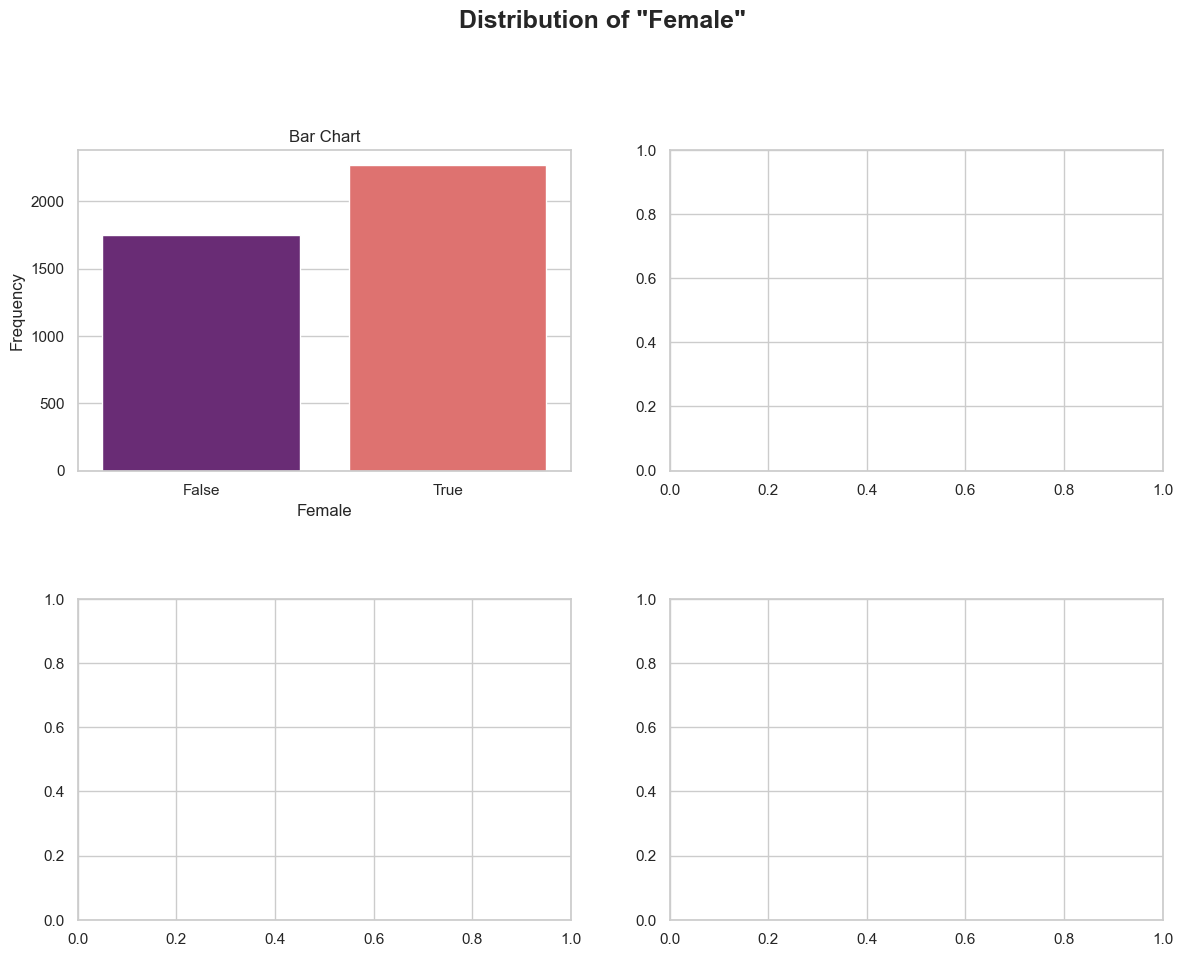

In [131]:
univariate_analysis_dropdown(df)

#####  categorical data 

In [132]:
def categorical_analysis(df):
    return print(df.select_dtypes(include='object').describe().T)
categorical_analysis(df)

                count unique            top  freq
Person_id        4020   4020  Id_eqz61wz7yn     1
Survey_date      4020     79     2023-02-13   121
Status           4020      7     unemployed  1775
Geography        4020      3          Urban  2797
Province         4020      9        Gauteng  1170
Math              997      7       0 - 29 %   321
Mathlit          1353      7      40 - 49 %   420
Additional_lang  2018      6      50 - 59 %   820
Home_lang         381      6      50 - 59 %   140
Science           732      7      30 - 39 %   263


In [133]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

def univariate_analysis_dropdown_categorical(df):
    exclude_cols = {'user_id'}
    categorical_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns if col not in exclude_cols]

    dropdown = widgets.Dropdown(
        options=categorical_cols,
        description='Variable:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    output = widgets.Output()

    def plot_categorical(change):
        output.clear_output()
        col = change['new']
        col_data = df[col].dropna()

        with output:
            fig, axes = plt.subplots(1, 2, figsize=(15, 6))
            fig.suptitle(f'Analyse Univariée de {col}', fontsize=16, fontweight='bold')

            sns.countplot(
                x=col_data,
                order=col_data.value_counts().index,
                palette="viridis",
                ax=axes[0]
            )
            axes[0].set_title('Count Plot')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Fréquence')
            axes[0].tick_params(axis='x', rotation=45)

            # Pie Chart
            explode_values = [0.05] * len(col_data.unique())
            col_data.value_counts().plot.pie(
                autopct='%1.1f%%',
                colors=sns.color_palette("viridis", len(col_data.unique())),
                explode=explode_values,
                ax=axes[1]
            )
            axes[1].set_title('Pie Chart')
            axes[1].set_ylabel('')

            plt.tight_layout()
            plt.show()

    dropdown.observe(plot_categorical, names='value')
    
    display(dropdown, output)
    if categorical_cols:
        dropdown.value = categorical_cols[0]
    else:
        print("Aucune variable catégorielle valide trouvée.")

In [134]:
univariate_analysis_dropdown_categorical(df)

Dropdown(description='Variable:', layout=Layout(width='50%'), options=('Person_id', 'Survey_date', 'Status', '…

Output()

### 3.	Bivariate Analysis

In [135]:
print(df['Target'].value_counts(normalize=True) * 100)
target='Target'

Target
0    72.810945
1    27.189055
Name: proportion, dtype: float64


#### multivariate analysis with respect to the target variable

In [136]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

def multivariate_analysis_interactive(df, target, sample_frac=0.3):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numeric_cols = df.select_dtypes(include=['float64','int64']).drop(columns=[target], errors='ignore').columns

    cat_dropdown = widgets.Dropdown(
        options=categorical_cols,
        description='Catégorie vs Target',
        layout=widgets.Layout(width='60%')
    )
    
    num_dropdown = widgets.Dropdown(
        options=numeric_cols,
        description='Numérique vs Target',
        layout=widgets.Layout(width='60%')
    )

    cat_output = widgets.Output()
    num_output = widgets.Output()

    def update_cat_plot(change):
        col = change['new']
        cat_output.clear_output()
        with cat_output:
            modalities = df[col].dropna().unique()
            n = len(modalities)
            fig, axes = plt.subplots(1, n, figsize=(6 * n, 5), sharey=True)
            if n == 1:
                axes = [axes]
            for i, modality in enumerate(modalities):
                subset = df[df[col] == modality]
                sns.histplot(subset[target], kde=True, ax=axes[i], color='skyblue')
                axes[i].set_title(f"{col} = {modality}")
                axes[i].set_xlabel(target)
            plt.suptitle(f"{target} Distribution par {col}", fontsize=16)
            plt.tight_layout()
            plt.show()

    def update_num_plot(change):
        col = change['new']
        num_output.clear_output()
        with num_output:
            sampled_df = df.sample(frac=sample_frac, random_state=42)
            fig, ax = plt.subplots(figsize=(8, 6))
            sns.boxplot(data=sampled_df, x=target, y=col, palette="pastel", ax=ax)
            ax.set_title(f"{col} Distribution by {target}", fontsize=14)
            ax.set_xlabel(f"{target} (0 = No, 1 = Yes)")
            ax.set_ylabel(col)
            plt.tight_layout()
            plt.show()

    cat_dropdown.observe(update_cat_plot, names='value')
    num_dropdown.observe(update_num_plot, names='value')

    display(widgets.HTML("<h3>Analyse Multivariée : Catégorielle vs Target</h3>"))
    display(cat_dropdown, cat_output)
    if len(categorical_cols) > 0:
        cat_dropdown.value = categorical_cols[0]

    display(widgets.HTML("<h3>Analyse Multivariée : Numérique vs Target</h3>"))
    display(num_dropdown, num_output)
    if len(numeric_cols) > 0:
        num_dropdown.value = numeric_cols[0]


In [137]:
multivariate_analysis_interactive(df, target)

HTML(value='<h3>Analyse Multivariée : Catégorielle vs Target</h3>')

Dropdown(description='Catégorie vs Target', layout=Layout(width='60%'), options=('Person_id', 'Survey_date', '…

Output()

HTML(value='<h3>Analyse Multivariée : Numérique vs Target</h3>')

Dropdown(description='Numérique vs Target', layout=Layout(width='60%'), options=('Round', 'Tenure', 'Matric', …

Output()

####  Advanced analysis

In [138]:
def bar_plot_combinations_interactive(df, target):

    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    if target in categorical_cols:
        categorical_cols.remove(target)
    if target in numeric_cols:
        numeric_cols.remove(target)

    cat_dropdown = widgets.Dropdown(options=categorical_cols, description="Catégorie", layout=widgets.Layout(width="45%"))
    num_dropdown = widgets.Dropdown(options=numeric_cols, description="Numérique", layout=widgets.Layout(width="45%"))

    output_plot = widgets.Output()

    def update_plot(change=None):
        cat_col = cat_dropdown.value
        num_col = num_dropdown.value
        output_plot.clear_output()

        with output_plot:
            if not cat_col or not num_col:
                print("Veuillez sélectionner une variable catégorielle et une numérique.")
                return

            plt.figure(figsize=(10, 6))
            sns.barplot(data=df, x=num_col, y=target, hue=cat_col, palette="viridis", alpha=0.6)
            plt.title(f"{target} vs {num_col} by {cat_col}")
            plt.xlabel(num_col)
            plt.ylabel(target)
            plt.legend(title=cat_col)
            plt.tight_layout()
            plt.show()

    cat_dropdown.observe(update_plot, names="value")
    num_dropdown.observe(update_plot, names="value")

    display(widgets.HTML("<h3>Analyse : bar Plot avec Cible, Numérique et Catégorie</h3>"))
    display(widgets.HBox([cat_dropdown, num_dropdown]))
    display(output_plot)

    if categorical_cols and numeric_cols:
        cat_dropdown.value = categorical_cols[0]
        num_dropdown.value = numeric_cols[0]

In [139]:
bar_plot_combinations_interactive(df, target)

HTML(value='<h3>Analyse : bar Plot avec Cible, Numérique et Catégorie</h3>')

Output()

#### correlation matrix

In [140]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

def correlation_and_significance(numeric_df, base_folder="correlation_analysis"):
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    cols = numeric_df.columns
    corr_matrix = numeric_df.corr()
    p_values = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
    
    for row in cols:
        for col in cols:
            if row != col:
                _, p_value = pearsonr(numeric_df[row], numeric_df[col])
                p_values.loc[row, col] = p_value
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                p_val = p_values.iloc[i, j]
                x = j + 0.5
                y = i + 0.5
                color = 'green' if p_val < 0.05 else 'red'
                plt.plot(x, y, 'o', color=color, markersize=8)
    
    green_patch = mpatches.Patch(color='green', label='Significant (p < 0.05)')
    red_patch = mpatches.Patch(color='red', label='Not Significant (p ≥ 0.05)')
    plt.legend(handles=[green_patch, red_patch], loc='upper left', bbox_to_anchor=(1.05, 1))
    
    plt.title('Correlation Matrix with Significance (Numerical Variables)', fontsize=18)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()

    corr_plot_path = os.path.join(base_folder, "correlation_matrix_significance.png")
    plt.savefig(corr_plot_path, bbox_inches='tight')
    plt.close()
    
    print(f"Correlation matrix with significance saved in: {corr_plot_path}")

    return corr_matrix, p_values, corr_plot_path


### 4.	Data Cleaning

#### data issues

In [141]:
import pandas as pd
import numpy as np

class DataCleaner:
    def __init__(self, df):
        self.df = df

    def clean_tenure(self):
        """Tenure doit être un nombre positif (mois). Supprime les valeurs aberrantes."""
        self.df['Tenure'] = pd.to_numeric(self.df['Tenure'], errors='coerce')
        self.df['Tenure'] = self.df['Tenure'].apply(lambda x: x if x >= 0 and x <= 120 else np.nan)  # Supprime si > 10 ans
        
    def clean_all(self):
        self.clean_tenure()
        return self.df
if __name__ == "__main__":    
    cleaner = DataCleaner(df)
    df = cleaner.clean_all()
    df

#### missing values 

#####  Steps to Handle Missing Values
**Step 1**: Drop columns with too many missing values

**Step 2**: Replace missing values in 'Additional_lang' with 0

**Step 3**: Use KNN imputation for the 'Schoolquintile' column

**Step 4**: Impute missing values with the mode for 'Matric', 'Degree', and 'Diploma'

**Step 5**: Use MICE (Iterative Imputer) to impute missing values in 'Tenure'

In [142]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
class MissingDataHandler:
    def __init__(self, df):
        self.df = df
        
    def apply_custom_strategy(self):
        """Applique la stratégie personnalisée de traitement des valeurs manquantes."""
        
        
        cols_to_drop = ['Math', 'Science', 'Home_lang', 'Mathlit']
        self.df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

        if 'Additional_lang' in self.df.columns:
            self.df['Additional_lang'].fillna("0%", inplace=True)

        if 'Schoolquintile' in self.df.columns:
            knn_imputer = KNNImputer(n_neighbors=5)
            self.df[['Schoolquintile']] = knn_imputer.fit_transform(self.df[['Schoolquintile']])

        for col in ['Matric', 'Degree', 'Diploma']:
            if col in self.df.columns:
                mode_val = self.df[col].mode()[0]
                self.df[col].fillna(mode_val, inplace=True)

        if 'Tenure' in self.df.columns:
            iter_imputer = IterativeImputer()
            self.df[['Tenure']] = iter_imputer.fit_transform(self.df[['Tenure']])
    def get_dataframe(self):
        """Return the processed DataFrame."""
        return self.df


In [143]:
handler = MissingDataHandler(df)
handler.apply_custom_strategy()
df = handler.get_dataframe()


####  Removing duplicates rows

In [144]:
def remove_duplicates(df, subset=None, keep='first', inplace=False):
    if keep not in ['first', 'last', 'none']:
        raise ValueError("keep must be one of 'first', 'last', or 'none'.")
    total_rows = len(df)
    
    duplicate_rows = df.duplicated(subset=subset, keep=False).sum()
    percentage_duplicates = (duplicate_rows / total_rows) * 100
    print(f"Total Rows: {total_rows}")
    print(f"Duplicate Rows: {duplicate_rows} ({percentage_duplicates:.2f}%)")
    if duplicate_rows == 0:
        print("No duplicates found. No rows removed.")
        return df if not inplace else None
    # Handle duplicate removal    if keep == 'none':
        # Drop all duplicates and keep only unique rows
        duplicated_mask = df.duplicated(subset=subset, keep=False)
        result = df[~duplicated_mask]
    else:
        # Use pandas built-in drop_duplicates
        result = df.drop_duplicates(subset=subset, keep=keep)
    # Count duplicates after removal
    remaining_rows = len(result)
    rows_removed = total_rows - remaining_rows
    print(f"Rows Removed: {rows_removed}")
    print(f"Remaining Rows: {remaining_rows}")
    if rows_removed > 0:
        print("Duplicates successfully removed.")
    else:
        print("No duplicates were removed.")
    if inplace:
        df.drop_duplicates(subset=subset, keep=keep, inplace=True)
    else:
        return result
remove_duplicates(df, subset=None, keep='first', inplace=False)

Total Rows: 4020
Duplicate Rows: 0 (0.00%)
No duplicates found. No rows removed.


,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Additional_lang,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,45.958042,Rural,Mpumalanga,1.0,0.0,0.0,3.000000,50 - 59 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,45.958042,Suburb,North West,1.0,0.0,0.0,1.000000,40 - 49 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,45.958042,Urban,Free State,1.0,0.0,0.0,2.696482,40 - 49 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,45.958042,Urban,Eastern Cape,1.0,0.0,0.0,2.696482,0%,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,45.958042,Urban,Limpopo,1.0,0.0,0.0,2.696482,0%,1,1,1998,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,Id_3lxfvtmbkr,2023-02-13,4,wage employed,45.958042,Rural,Limpopo,1.0,0.0,0.0,2.000000,50 - 59 %,1,1,2000,1,0
4016,Id_u3uc3v9pts,2023-02-02,4,unemployed,45.958042,Urban,Gauteng,1.0,0.0,1.0,2.696482,60 - 69 %,0,1,1999,3,0
4017,Id_enkksj5q5r,2023-03-20,4,unemployed,45.958042,Urban,KwaZulu-Natal,0.0,0.0,0.0,1.000000,0%,1,1,1991,10,0
4018,Id_3rtpd7kc1g,2022-03-15,2,studying,45.958042,Urban,Eastern Cape,1.0,0.0,0.0,3.000000,60 - 69 %,1,1,2000,1,1


#### Outliers 

In [145]:
import pandas as pd

def count_outliers_iqr(df):
    outliers_count = {}
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        unique_vals = df[col].dropna().unique()

        # Vérifie si c'est une colonne binaire (0 et 1 uniquement)
        if set(unique_vals).issubset({0, 1}) and len(unique_vals) <= 2:
            continue  # Skip les colonnes binaires

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers_count[col] = count

    return outliers_count
count_outliers_iqr(df)


{'Round': 0,
 'Tenure': 715,
 'Schoolquintile': 342,
 'Birthyear': 107,
 'Birthmonth': 0}

In [146]:
class DataCleaner:
    def __init__(self, df):
        self.df = df
        self.numeric_columns = self.df.select_dtypes(include=['number']).columns.to_list()

    def remove_na_inf(self):
        """Replaces infinite values with NaN and drops rows containing NaN."""
        self.df[self.numeric_columns] = self.df[self.numeric_columns].replace([np.inf, -np.inf], np.nan).dropna()
        print(" NaN and infinite values removed.")

    def detect_outliers_iqr(self):
        outliers_dict = {}

        for col in self.numeric_columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Find outlier indices
            outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)].index
            outliers_dict[col] = outliers

        return outliers_dict

    def drop_outliers(self):
        """Drops rows containing outliers based on the IQR method."""
        outliers_dict = self.detect_outliers_iqr()
        outlier_indices = set(index for indices in outliers_dict.values() for index in indices)
        self.df = self.df.drop(outlier_indices)
        print(" Outliers removed.")

    def replace_outliers_iqr(self):
        """Replaces outliers with the lower and upper IQR bounds (Winsorization)."""
        for col in self.numeric_columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            self.df[col] = np.where(self.df[col] < lower_bound, lower_bound, self.df[col])
            self.df[col] = np.where(self.df[col] > upper_bound, upper_bound, self.df[col])
        
        print(" Outliers replaced using IQR bounds.")

    def replace_outliers_median(self):
        """Replaces outliers with the column median."""
        for col in self.numeric_columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            median_value = self.df[col].median()

            self.df[col] = np.where((self.df[col] < lower_bound) | (self.df[col] > upper_bound), median_value, self.df[col])
        
        print(" Outliers replaced with median.")

    def replace_outliers_knn(self, n_neighbors=5):
        """Replaces outliers using K-Nearest Neighbors (KNN) imputation."""
        imputer = KNNImputer(n_neighbors=n_neighbors)
        self.df[self.numeric_columns] = imputer.fit_transform(self.df[self.numeric_columns])
        print(" Outliers replaced using KNN imputation.")

    def save_cleaned_data(self, filename="cleaned_data.csv"):
        """Saves the cleaned DataFrame as a CSV file."""
        self.df.to_csv(filename, index=False)
        print(f" Cleaned data saved to {filename}.")

    def clean_data(self, method="median"):
        self.remove_na_inf()  

        if method == "drop":
            self.drop_outliers()
        elif method == "winsorization":
            self.replace_outliers_iqr()
        elif method == "median":
            self.replace_outliers_median()
        elif method == "knn":
            self.replace_outliers_knn()
        else:
            print("Invalid method. Choose from 'drop', 'winsorization', 'median', 'knn'.")

        self.save_cleaned_data()


In [147]:
cleaner = DataCleaner(df[["Tenure"]])
cleaner.clean_data(method="winsorization")

 NaN and infinite values removed.
 Outliers replaced using IQR bounds.
 Cleaned data saved to cleaned_data.csv.


C:\Users\Client\AppData\Local\Temp\ipykernel_16092\1009787852.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.numeric_columns] = self.df[self.numeric_columns].replace([np.inf, -np.inf], np.nan).dropna()
C:\Users\Client\AppData\Local\Temp\ipykernel_16092\1009787852.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[col] = np.where(self.df[col] < lower_bound, lower_bound, self.df[col])
C:\Users\Client\AppData\Local\Temp\ipykernel_16092\1009787852.py:44: SettingWithCopyWarning: 
A va

#### Data type conversions

##### Converts column data types based on their values:
        - Converts strings containing numbers to int/float.
        - Converts float columns with only integer values to int.
        - Converts boolean-like columns (0/1) to bool.
        - Converts date-like columns to datetime.
        - Converts categorical columns (few unique values) to category.

In [148]:
class DataTypeConverter:
    def __init__(self, df):
        self.df = df 

    def convert_data_types(self):
        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                try:
                    self.df[col] = pd.to_numeric(self.df[col])
                except ValueError:
                    pass  

            if self.df[col].dtype == 'float64':
                if (self.df[col].dropna() % 1 == 0).all():
                    self.df[col] = self.df[col].astype(int)

            if set(self.df[col].dropna().unique()) == {0, 1}:
                self.df[col] = self.df[col].astype(bool)

            if self.df[col].dtype == 'object':
                try:
                    self.df[col] = pd.to_datetime(self.df[col])
                except ValueError:
                    pass  
                
            if self.df[col].dtype == 'object' and self.df[col].nunique() / len(self.df) < 0.05:
                self.df[col] = self.df[col].astype('category')

        print(" Data types converted successfully.")

    def get_dataframe(self):
        """Returns the converted DataFrame."""
        return self.df
converter = DataTypeConverter(df)
converter.convert_data_types()
df = converter.get_dataframe()


 Data types converted successfully.


## Section B: Feature Engineering 

### 1.	Create New Features

1. Age


In [149]:
df['Age'] = df['Survey_date'].dt.year - df['Birthyear']

2. Education Level 

In [150]:
df["Education_level"] = (
    df["Matric"].astype(int) * 1 +
    df["Diploma"].astype(int) * 2 +
    df["Degree"].astype(int) * 3
)

3_Create the Province_income_tier column based on average income levels

In [151]:
high_income = ["Gauteng", "Western Cape"]
low_income = ["Limpopo", "Eastern Cape", "Free State", "Northern Cape"]

def income_tier(prov):
    if prov in high_income:
        return "High"
    elif prov in low_income:
        return "Low"
    else:
        return "Medium"

df["Province_income_tier"] = df["Province"].apply(income_tier)


4. Employment Stability Index

In [152]:
Stability_Index = df["Tenure"] / (df["Age"] / 12)

6.Age groupe

In [153]:
bins = [18, 30, 40, 50]  
labels = ['18-30', '30-40', '40-50']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

7.Schoolquintile_Group

In [154]:
bins = [0.0, 2.0, 4.0, 5.0]  
labels = ['Low', 'Medium', 'High']

df['Schoolquintile_Group'] = pd.cut(df['Schoolquintile'],bins=bins,labels=labels,right=False  )

8. Tenure_Group

In [155]:
bins = [-1, 0, 12, 60, 120]  
labels = ['Unemployed', 'Short-Term', 'Medium-Term', 'Long-Term']
df['Tenure_Group'] = pd.cut(df['Tenure'],bins=bins,labels=labels,right=True )

print(df['Tenure_Group'].value_counts())

Tenure_Group
Medium-Term    3515
Long-Term       312
Unemployed      133
Short-Term       60
Name: count, dtype: int64


9. Status_Group

In [156]:
status_map = {
    'unemployed': 'Inactive',
    'studying': 'Student',
    'wage employed': 'Active',
    'self employed': 'Active',
    'wage and self employed': 'Active',
    'employment programme': 'Student',
    'other': 'Inactive'
}
df['Status_Group'] = df['Status'].map(status_map)
print(df['Status_Group'].value_counts())

Status_Group
Inactive    2053
Student      997
Active       970
Name: count, dtype: int64


### 2. Eliminate variables  (overfitting or multicollinearity)

####  to eliminate in order to reduce overfitting, using both correlation and VIF (Variance Inflation Factor) analysis

 VIF > 5 → high multicollinearity. Consider removing .

 VIF between 1 and 5 → acceptable.

 VIF ≈ 1 → ideal, no multicollinearity.

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

numeric_df = df.select_dtypes(include=[np.number])
def compute_vif(data):
    """Calculate VIF for each numeric feature"""
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data.dropna())
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

features_for_vif = numeric_df.drop(columns=['mental_health_score'], errors='ignore')
vif_result = compute_vif(features_for_vif)

print("\n--- VIF Results ---\n")
print(vif_result)


--- VIF Results ---

           feature         VIF
3        Birthyear  484.944329
5              Age  477.958018
0            Round    9.151592
4       Birthmonth    1.120656
1           Tenure    1.056912
2   Schoolquintile    1.004693
6  Education_level    1.003999


In [158]:
df.columns

Index(['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography',
       'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile',
       'Additional_lang', 'Female', 'Sa_citizen', 'Birthyear', 'Birthmonth',
       'Target', 'Age', 'Education_level', 'Province_income_tier', 'Age_Group',
       'Schoolquintile_Group', 'Tenure_Group', 'Status_Group'],
      dtype='object')

Remove the variables using in new feature(multicollinearity) and causes the overfitting

In [159]:
df = df.set_index('Person_id')
cols_to_drop = ["Birthyear",'Birthmonth',"Survey_date"]
df= df.drop(columns=cols_to_drop)

### 3.	Feature Encoding

In [160]:
def get_object_columns(df, target=None):
    object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    if target and target in object_cols:
        object_cols.remove(target)

    return object_cols

object_columns = get_object_columns(df, target='Target')
print(len(object_columns), "\n", object_columns)

9 
 ['Status', 'Geography', 'Province', 'Additional_lang', 'Province_income_tier', 'Age_Group', 'Schoolquintile_Group', 'Tenure_Group', 'Status_Group']


In [161]:
def label_encode_columns(df, columns=object_columns, verbose=True):
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            
            if verbose:
                mapping = dict(zip(le.classes_, le.transform(le.classes_)))
                print(f"\n[INFO] Label Encoding for '{col}': {mapping}")
        else:
            print(f"[WARNING] Column '{col}' not found in DataFrame.")
    
    return df
df=label_encode_columns(df, columns=object_columns, verbose=True)


[INFO] Label Encoding for 'Status': {'employment programme': 0, 'other': 1, 'self employed': 2, 'studying': 3, 'unemployed': 4, 'wage and self employed': 5, 'wage employed': 6}

[INFO] Label Encoding for 'Geography': {'Rural': 0, 'Suburb': 1, 'Urban': 2}

[INFO] Label Encoding for 'Province': {'Eastern Cape': 0, 'Free State': 1, 'Gauteng': 2, 'KwaZulu-Natal': 3, 'Limpopo': 4, 'Mpumalanga': 5, 'North West': 6, 'Northern Cape': 7, 'Western Cape': 8}

[INFO] Label Encoding for 'Additional_lang': {'0%': 0, '30 - 39 %': 1, '40 - 49 %': 2, '50 - 59 %': 3, '60 - 69 %': 4, '70 - 79 %': 5, '80 - 100 %': 6}

[INFO] Label Encoding for 'Province_income_tier': {'High': 0, 'Low': 1, 'Medium': 2}

[INFO] Label Encoding for 'Age_Group': {'18-30': 0, '30-40': 1, '40-50': 2, nan: 3}

[INFO] Label Encoding for 'Schoolquintile_Group': {'High': 0, 'Low': 1, 'Medium': 2, nan: 3}

[INFO] Label Encoding for 'Tenure_Group': {'Long-Term': 0, 'Medium-Term': 1, 'Short-Term': 2, 'Unemployed': 3}

[INFO] Label Enc

## Section C: Machine Learning Modeling with OOP

### modeling package and spliting 

In [162]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import (GradientBoostingClassifier,AdaBoostClassifier)
from lightgbm import LGBMClassifier 

In [163]:
x= df.drop(columns=["Target"])
y= df['Target']

In [164]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y)

In [165]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.fit_transform(x_test)

### 1.	Class Design

#### 1.without tuning 

In [ ]:
class ClassifierComparison:
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.results = []

    def evaluate_model(self, name, model):
        print(f"Training {name}...")

        training_start = time.perf_counter()
        model.fit(self.x_train, self.y_train)
        training_end = time.perf_counter()

        prediction_start = time.perf_counter()
        y_pred_train = model.predict(self.x_train)
        y_pred_test = model.predict(self.x_test)
        prediction_end = time.perf_counter()

        try:
            y_proba_test = model.predict_proba(self.x_test)[:, 1]
        except:
            try:
                y_proba_test = model.decision_function(self.x_test)
                y_proba_test = (y_proba_test - y_proba_test.min()) / (y_proba_test.max() - y_proba_test.min())
            except:
                y_proba_test = np.zeros_like(y_pred_test) 

        self.results.append({
            'Model': name,
            'Train Accuracy': accuracy_score(self.y_train, y_pred_train),
            'Test Accuracy': accuracy_score(self.y_test, y_pred_test),
            'F1 Score': f1_score(self.y_test, y_pred_test, average='binary'),
            'ROC AUC': roc_auc_score(self.y_test, y_proba_test),
            'Training Time (s)': training_end - training_start,
            'Prediction Time (s)': prediction_end - prediction_start
        })

    def run_all(self):
        # Logistic Regression
        self.evaluate_model("Logistic Regression", LogisticRegression(max_iter=1000))

        # Random Forest
        rf_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('rf', RandomForestClassifier(random_state=42))
        ])
        self.evaluate_model("Random Forest", rf_pipeline)

        # KNN
        knn_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier(n_neighbors=5))
        ])
        self.evaluate_model("K-Nearest Neighbors", knn_pipeline)

        # SVM
        svm_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', LinearSVC(max_iter=10000))
        ])
        self.evaluate_model("Linear SVM", svm_pipeline)

        # XGBoost
        xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        self.evaluate_model("XGBoost", xgb_model)

        # Gradient Boosting
        gb_model = GradientBoostingClassifier()
        self.evaluate_model("Gradient Boosting", gb_model)

        # AdaBoost
        ada_model = AdaBoostClassifier()
        self.evaluate_model("AdaBoost", ada_model)
        
        # LightGBM
        self.evaluate_model("LightGBM", LGBMClassifier())


    def get_results(self):
        return pd.DataFrame(self.results)
comp = ClassifierComparison(x_train, x_test, y_train, y_test)
comp.run_all()
results_df = comp.get_results()
print(results_df)

Training Logistic Regression...
Training Random Forest...
Training K-Nearest Neighbors...
Training Linear SVM...
Training XGBoost...
Training Gradient Boosting...
Training AdaBoost...
Training LightGBM...
[LightGBM] [Info] Number of positive: 874, number of negative: 2342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 3216, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.271766 -> initscore=-0.985680
[LightGBM] [Info] Start training from score -0.985680
                 Model  Train Accuracy  Test Accuracy  F1 Score   ROC AUC  \
0  Logistic Regression        0.800684       0.805970  0.530120  0.747976   
1        Random Forest        0.986629       0.805970  0.564246  0.802189   
2  K-Neares

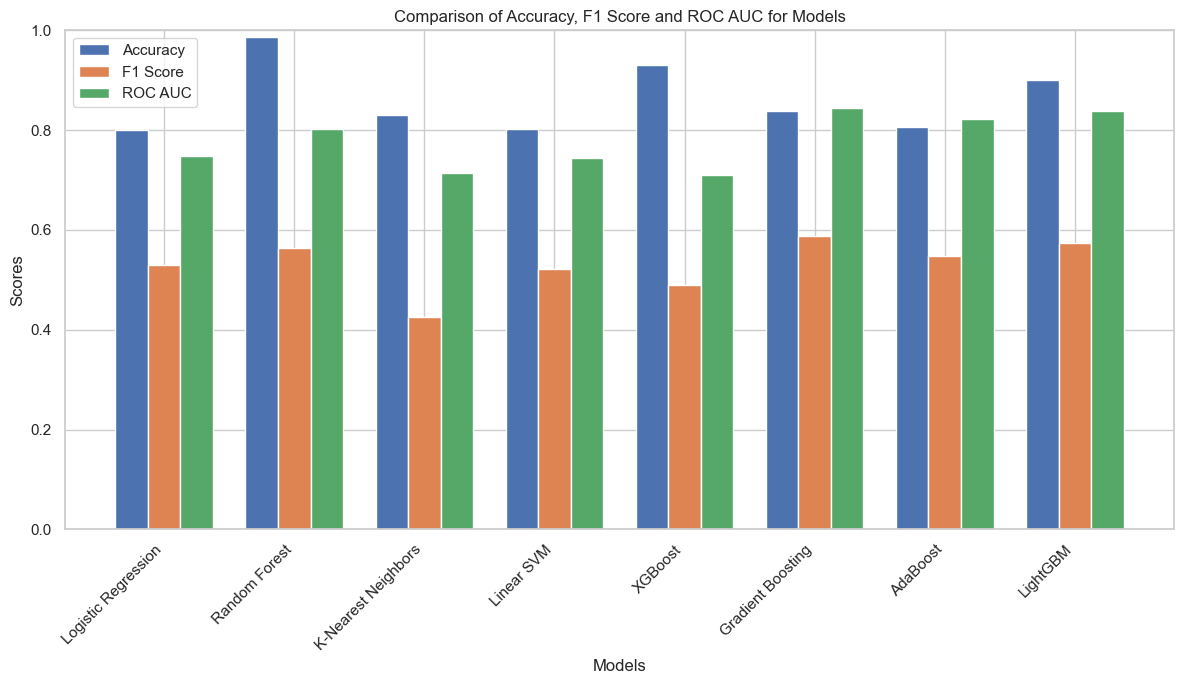

In [167]:
def plot_metrics_comparison(results_df):
    metrics = ['Train Accuracy', 'F1 Score', 'ROC AUC']
    models = results_df['Model'].values
    bar_width = 0.25
    indices = np.arange(len(models))
    
    plt.figure(figsize=(12, 7))
    
    plt.bar(indices, results_df['Train Accuracy'], width=bar_width, label='Accuracy')
    plt.bar(indices + bar_width, results_df['F1 Score'], width=bar_width, label='F1 Score')
    plt.bar(indices + 2 * bar_width, results_df['ROC AUC'], width=bar_width, label='ROC AUC')
    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title('Comparison of Accuracy, F1 Score and ROC AUC for Models')
    plt.xticks(indices + bar_width, models, rotation=45, ha='right')
    plt.ylim(0, 1)  
    
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_metrics_comparison(results_df)


#### hyperparamètres tuning 

In [168]:
from sklearn.model_selection import GridSearchCV
class ClassifierComparison:
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        self.results = []

    def evaluate_model(self, name, model, param_grid=None, use_grid_search=False):
        print(f"Training {name}...")

        if use_grid_search and param_grid is not None:
            grid = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=1)  
            model = grid.fit(self.x_train, self.y_train).best_estimator_
        else:
            model.fit(self.x_train, self.y_train)

        training_start = time.perf_counter()
        model.fit(self.x_train, self.y_train)
        training_end = time.perf_counter()

        prediction_start = time.perf_counter()
        y_pred_train = model.predict(self.x_train)
        y_pred_test = model.predict(self.x_test)
        prediction_end = time.perf_counter()

        try:
            y_proba_test = model.predict_proba(self.x_test)[:, 1]
        except:
            try:
                y_proba_test = model.decision_function(self.x_test)
                y_proba_test = (y_proba_test - y_proba_test.min()) / (y_proba_test.max() - y_proba_test.min())
            except:
                y_proba_test = np.zeros_like(y_pred_test)

        self.results.append({
            'Model': name,
            'Train Accuracy': accuracy_score(self.y_train, y_pred_train),
            'Test Accuracy': accuracy_score(self.y_test, y_pred_test),
            'F1 Score': f1_score(self.y_test, y_pred_test),
            'ROC AUC': roc_auc_score(self.y_test, y_proba_test),
            'Training Time (s)': training_end - training_start,
            'Prediction Time (s)': prediction_end - prediction_start
        })

    def run_all(self):
        self.evaluate_model(
            "Logistic Regression",
            LogisticRegression(max_iter=1000),
            {'C': [0.01, 0.1, 1]},
            use_grid_search=True
        )
        self.evaluate_model(
            "Random Forest",
            Pipeline([
                ('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))
            ]),
            {'rf__n_estimators': [100, 200], 'rf__max_depth': [5, 10]},
            use_grid_search=True
        )
        self.evaluate_model(
            "K-Nearest Neighbors",
            Pipeline([
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier())
            ]),
            {'knn__n_neighbors': [3, 5, 7]},
            use_grid_search=True
        )
        self.evaluate_model(
            "Linear SVM",
            Pipeline([
                ('scaler', StandardScaler()),
                ('svm', LinearSVC(max_iter=10000))
            ]),
            {'svm__C': [0.01, 0.1, 1, 10]},
            use_grid_search=True
        )
        self.evaluate_model(
            "XGBoost",
            XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
            {'n_estimators': [100, 200], 'max_depth': [3, 5]},
            use_grid_search=True
        )
        self.evaluate_model(
            "Gradient Boosting",
            GradientBoostingClassifier(),
            {'n_estimators': [100, 200], 'max_depth': [3, 5]},
            use_grid_search=True
        )
        self.evaluate_model(
            "AdaBoost",
            AdaBoostClassifier(),
            {'n_estimators': [50, 100], 'learning_rate': [0.5, 1.0]},
            use_grid_search=True
        )
        self.evaluate_model(
            "LightGBM",
            LGBMClassifier(),
            {'n_estimators': [100, 200], 'num_leaves': [15, 31]},
            use_grid_search=True
        )

    def get_results(self):
        return pd.DataFrame(self.results)

In [169]:
comp = ClassifierComparison(x_train, x_test, y_train, y_test)
comp.run_all()
results_df = comp.get_results()
print(results_df)


Training Logistic Regression...
Training Random Forest...
Training K-Nearest Neighbors...
Training Linear SVM...
Training XGBoost...
Training Gradient Boosting...
Training AdaBoost...
Training LightGBM...
[LightGBM] [Info] Number of positive: 583, number of negative: 1561
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 2144, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.271922 -> initscore=-0.984895
[LightGBM] [Info] Start training from score -0.984895
[LightGBM] [Info] Number of positive: 583, number of negative: 1561
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memor

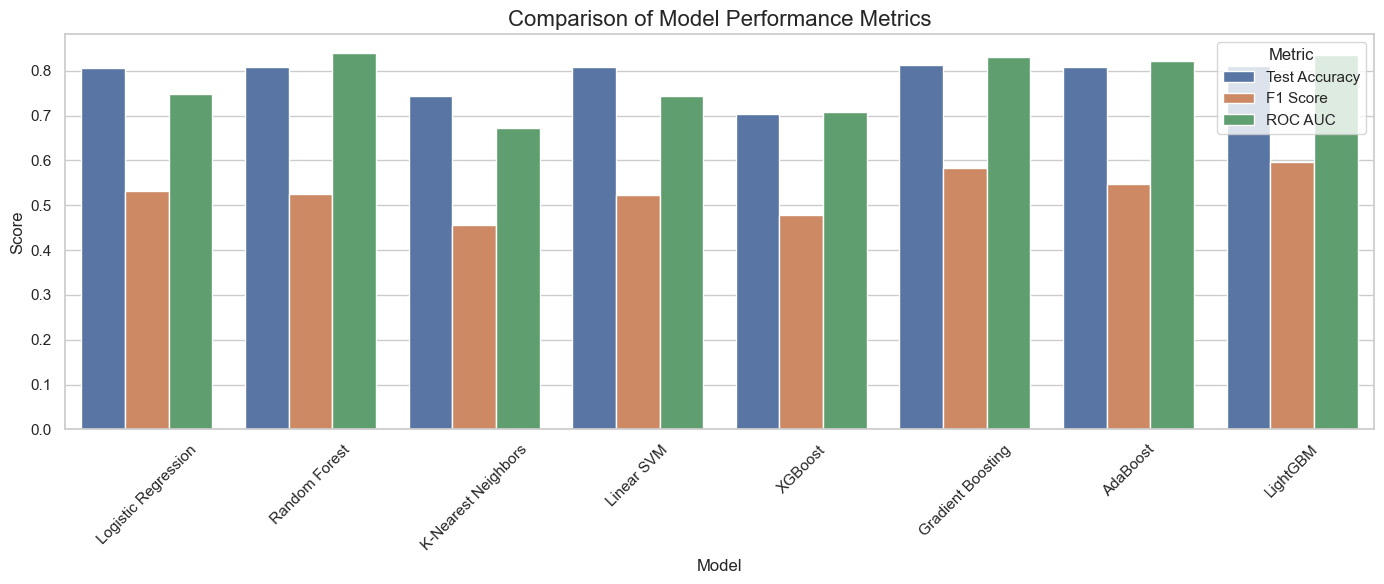

In [170]:
sns.set(style="whitegrid")
metrics_to_plot = ["Test Accuracy", "F1 Score", "ROC AUC"]
melted_df = results_df.melt(id_vars="Model", value_vars=metrics_to_plot,
                            var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 6))
sns.barplot(data=melted_df, x="Model", y="Score", hue="Metric")

plt.title("Comparison of Model Performance Metrics", fontsize=16)
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


## Section D: Interpretation & Recommendations


### 1.	Feature Importance


use a Random Forest Classifier to estimate the importance of the features

In [171]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

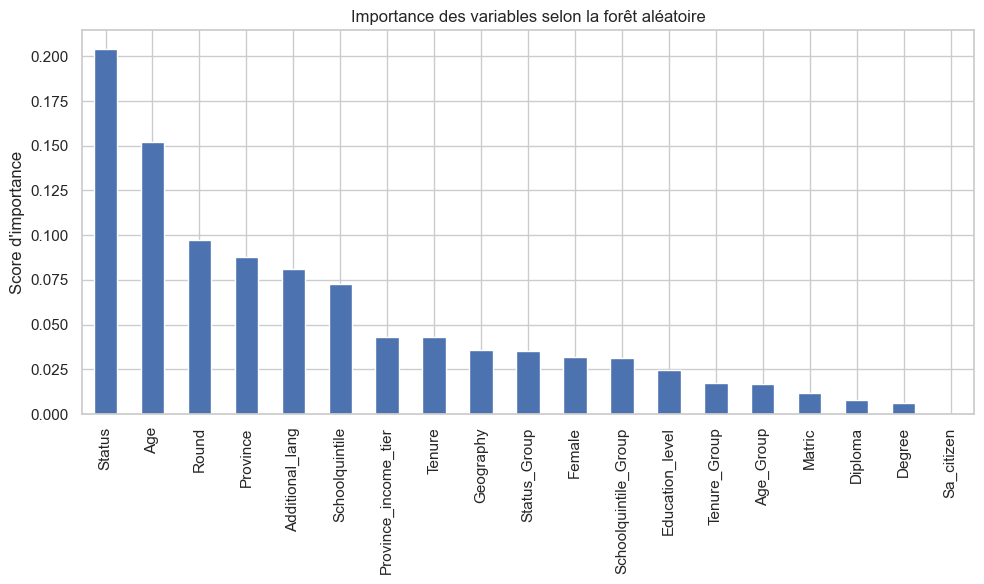

In [172]:
importances = rf.feature_importances_
feature_names = x.columns
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_importances.plot(kind='bar')
plt.title('Importance des variables selon la forêt aléatoire')
plt.ylabel('Score d\'importance')
plt.tight_layout()
plt.show()



### Model Results

Our model comparison shows that **Random Forest** and **XGBoost** perform the best. These models achieve excellent generalization, with **ROC AUC scores above 0.80** and **test accuracy reaching around 81%**.

We used **stratified sampling** to maintain the original distribution of the target variable across training and test sets. This approach ensures realistic and robust results without relying on oversampling methods like SMOTE.

---

### Key Influential Features

Among all the variables analyzed, the most influential in predicting employment are:
- Employment **Status**,
- **Age**,
- **Province** of residence,
- **Education level** (especially Matric, Diploma, Degree),
- **School quintile**,
- Employment **Tenure**,
- **Income tier** of the province.

These features provide deep insight into the factors influencing youth employment in the country.

---

### Strategic Recommendations

#### 1. Target High-Risk Groups
Young people aged 18 to 25 with low education levels (Matric or less) living in low-income provinces (like Limpopo or Eastern Cape) are most at risk of unemployment.

These groups should be the top priority for government and NGO interventions through:
- Vocational training programs,
- Subsidized internships,
- Career mentorship initiatives.

#### 2. Allocate Resources Regionally
We recommend different strategies based on regional income levels:

- **High-income provinces** (e.g., Gauteng, Western Cape) should partner with businesses to create job pipelines and startup incubators.
- **Low-income provinces** need investments in basic education infrastructure, technical schools, and community-based job programs.

Tracking **regional ROC AUC scores** over time can be a useful way to measure policy impact.

#### 3. Launch Awareness Campaigns
Education proves to be a key predictor of employment. Awareness campaigns such as **“A degree opens doors to employment”** should be targeted to young adults (18–30 years old), especially through social media.

These campaigns could include:
- Career simulation tools,
- Testimonials from employed graduates,
- Motivational content encouraging continued education.

#### 4. Improve Data Quality
Important features like **Tenure** and **School Quintile** still suffer from missing or unreliable data. Improving the quality of data collection during national surveys is essential.

At the same time, redundant or low-impact variables (e.g., Birth Year) can be removed to simplify and improve model performance.

---

### Conclusion

By using high-performing models such as **Random Forest** and **XGBoost**, combined with stratified sampling and carefully selected features, we can accurately predict employment status in South Africa.

These insights allow for **evidence-based policies** to reduce youth unemployment, improve access to education, and allocate resources more efficiently by region.

The model can be integrated into dashboards to help policymakers **prioritize actions** and **track progress** over time.
